## Test set으로 모델의 최종성능 평가하기


In [1]:
import pandas as pd

house_data = pd.read_csv("../../COALA_DS_DATA/COALA_DS_DATA/week5/data/house.csv")
house_data = house_data.drop(['id', 'date'], axis = 1)
from sklearn.model_selection import train_test_split

train_data = house_data.drop(['price'], axis = 1)
target_data = house_data['price']

# train : test set -> 8 : 2
x_train, x_test, y_train, y_test = train_test_split(train_data, target_data, test_size = 0.2)

# # 다시 train set을 8: 2로 나눠 val_data
# x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)

print("모든 데이터", train_data.shape) # (행, 열)
print("Train set", x_train.shape, y_train.shape)
# print("Valid set", x_valid.shape, y_valid.shape)
print("Test set", x_test.shape,  y_test.shape)

모든 데이터 (21613, 18)
Train set (17290, 18) (17290,)
Test set (4323, 18) (4323,)


In [2]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

print('train set score', lr.score(x_train, y_train))
print('test set score', lr.score(x_test, y_test))

train set score 0.6985060727493558
test set score 0.7026833565721539


In [3]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2), 
                     LinearRegression())
model.fit(x_train, y_train)
print('train set score', model.score(x_train, y_train))
print('test set score', model.score(x_test, y_test))

train set score 0.8281220033560497
test set score 0.8255149404936695


In [4]:
model3 = make_pipeline(PolynomialFeatures(3), 
                     LinearRegression())
model3.fit(x_train, y_train)
print('train set score', model3.score(x_train, y_train))
print('test set score', model3.score(x_test, y_test))

train set score 0.8504986135757353
test set score 0.40096465786958146


In [5]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler() # StandardScaler는 정규분포에 속성을 이용한 방식

xs_train = scaler.fit_transform(x_train)
xs_train = pd.DataFrame(xs_train, columns = x_train.columns)

ys_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
ys_train = pd.DataFrame(ys_train, columns = ['price'])

xs_test = scaler.fit_transform(x_test)
xs_test = pd.DataFrame(xs_test, columns = x_test.columns)

ys_test = scaler.fit_transform(y_test.values.reshape(-1, 1))
ys_test = pd.DataFrame(ys_test, columns = ['price'])

In [6]:
lr = LinearRegression()
lr.fit(xs_train, ys_train)

print('train set score', lr.score(xs_train, ys_train))
print('test set score', lr.score(xs_test, ys_test))

train set score 0.6985060727493559
test set score 0.7040220512400168


In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(2),
                    LinearRegression()).fit(xs_train, ys_train)
print('train set score', model.score(xs_train, ys_train))
print('test set score', model.score(xs_test, ys_test))

train set score 0.8284908991570836
test set score -2.260427706261129e+16


In [8]:
model2 = make_pipeline(PolynomialFeatures(3), 
                     LinearRegression())

model2.fit(xs_train, ys_train)
print('train set score', model2.score(xs_train, ys_train))
print('test set score', model2.score(xs_test, ys_test))

train set score 0.90313466991141
test set score -3.905927880743014e+16


In [9]:
from sklearn.linear_model import Ridge

model3 = make_pipeline(PolynomialFeatures(2),
                      Ridge(alpha=0.1)).fit(xs_train, ys_train)

print('train set score', model3.score(xs_train, ys_train))
print('test set score', model3.score(xs_test, ys_test))

train set score 0.8284885032871957
test set score 0.8225158009464967


In [10]:
from sklearn.linear_model import Ridge

model4 = make_pipeline(PolynomialFeatures(3),
                      Ridge(alpha=0.1)).fit(xs_train, ys_train)

print('train set score', model4.score(xs_train, ys_train))
print('test set score', model4.score(xs_test, ys_test))

train set score 0.9030863199968348
test set score 0.3386033762208901


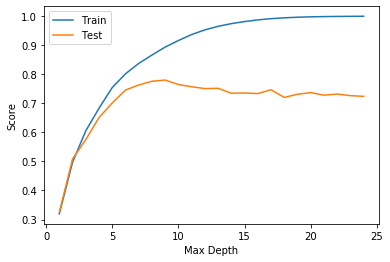

In [12]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

train_score = []
test_score = []
depth_range = range(1, 25)
for dept in depth_range:
    tree = DecisionTreeRegressor(max_depth = dept).fit(xs_train, ys_train)
    
    train_score.append(tree.score(xs_train, ys_train))
    test_score.append(tree.score(xs_test, ys_test))
    
plt.plot(depth_range, train_score)
plt.plot(depth_range, test_score)

plt.legend(['Train', 'Test'])

plt.xlabel('Max Depth')
plt.ylabel('Score')

plt.show()